# SMV2rho: Tutorial 5

In this tutorial we will see how we can include temperature dependence within the density conversion scheme.  Note that this is only pssible with the `SMV2rho`/`'stephenson'` scheme because the `'brocher'` approach is explicitly not a temperature- or -pressure dependent approach and so we do not recommend including this dependency with this scheme.

Secondly, we will explore the option to set the uppermost layer of the crust to have a constant density.  This option allows us to exclude the portion of the crust that experiences an exponential velocity drop-off.

In [10]:
# import modules
import numpy as np
from SMV2rho import plotting as smplt
from SMV2rho import density_functions as smd
from SMV2rho import Constants as c

## Class approach

Again we will first go through this procedure step-by-step so that we can query the outputs.

### Load file

Let's define the velocity profile that we are interested in converting, initialise the Convert class and read in the profile data file.

In [11]:
# path to test velocity file
#  - this file comes with the distribution so there is no need to change this path
vp_file = "../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat"

# load a profile into the Convert class
profile = smd.Convert(vp_file, profile_type = "Vp")

# read data
profile.read_data()

# import parameter data
parameter_file = "../PARAMETER_FILES/Vp_parameters.dat"
parameters = np.loadtxt(parameter_file)

## Convert Profile

This time we will set `T_dependence = True`.  This option will prompt the program to look for a file that sets the temperature-dependent parameters.  In turn, this will prompt an error message because we have not provided the correct file.



In [12]:
# calculate density profile -- note default is the temperature dependence is True!
profile.V_to_density_stephenson(parameters, T_dependence = True)

ValueError: T_dependence is set to True but T_parameters have not been set

The parameter file must have the following format (please refer to Stephenson et al (_in review_) for details on parameter definitions.  In this case we are loading in a general `T_parameters` file that includes $V_P$ and $V_S$ parameters with the structure:

parameters $ = [m_P, m_S, \alpha_0, \alpha_1, K_c]$

We only need to $V_P$ parameters, and when converting an individual profile we must provide parameters in the format:

parameters $ = [m, \alpha_0, \alpha_1, K_c]$,

where $m$ is the value of $\partial v / \partial T$ for the velocity type of interest, in this case P velocity.  We will edit the general parameter file to place the `T_parameters` object in this format.

Let's load in the temperature dependent parameter file and convert the profile.

Note, as with the previous tutorial, running this function may result in an integration warning.  This warning can be safely ignored and is generated because the velocity and density profile functions $V_P(z)$ and $\rho (z)$ contain discontinuities.

In [27]:
# load parameters for temperature dependence
# T parameters file has following structure...
#   [dVpdT, dVsdT, alpha0, alpha1, K]
T_parameters = np.loadtxt("../PARAMETER_FILES/T_parameters.dat")

# get the Vp parameters (i.e. exclude the Vs dv/dT parameter)
# if you provide too many parameters, you will get a ValueError.
T_parameters_Vp = [T_parameters[0], T_parameters[2], T_parameters[3],
                  T_parameters[4]]

# calculate density profile -- note default is the temperature dependence is True!
profile.V_to_density_stephenson(parameters, T_dependence = True, T_parameters = T_parameters_Vp)

profile.data.keys()

dict_keys(['station', 'Vp_file', 'region', 'moho', 'location', 'av_Vp', 'Vp', 'type', 'method', 'rho', 'av_rho', 'rho_hi_res', 'Vp_hi_res', 'p', 'T'])

## Outputs and plotting

We can now explore the outputs.  We can already see that we now have a `'T'` key within the output dictionary.  This temperature profile is generated using a constant moho and surface heat flux with heat production concentrated within the upper 10 km.  It is possible to edit the parametrisation of the geotherm  within the `temperature_dependence` and `density_functions` modules.

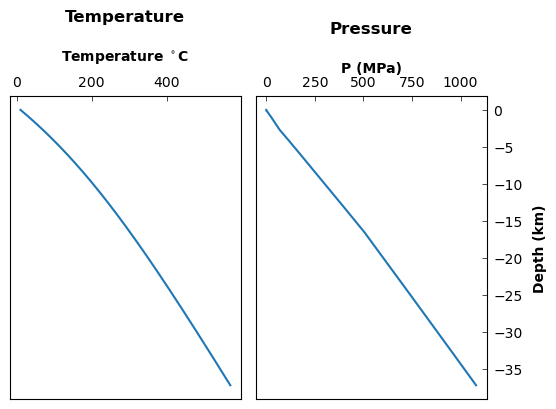

In [28]:
# Define plot settings
plot_type = 'line'
titles = ['Temperature', 'Pressure']
xlabels = [r'Temperature $^\circ$C', 'P (MPa)']
ylabels = ['Depth (km)', 'Depth (km)']

# data1, data2 and data3 -- list of dictionaries for each panel for each data series.
data1 = [{'x': profile.data["T"][:,1], 'y': profile.data["T"][:,0]}]
data2 = [{'x': profile.data["p"][:,1], 'y': profile.data["p"][:,0]}]

# Call the plot_panels function
smplt.plot_panels([data1, data2], plot_type=plot_type, 
            cmap=None, titles=titles, 
            xlabels=xlabels, ylabels=ylabels,
            z_values=None, figure_scale=0.7, 
            save_path=None)

Now let's plot up the velocity and density curves

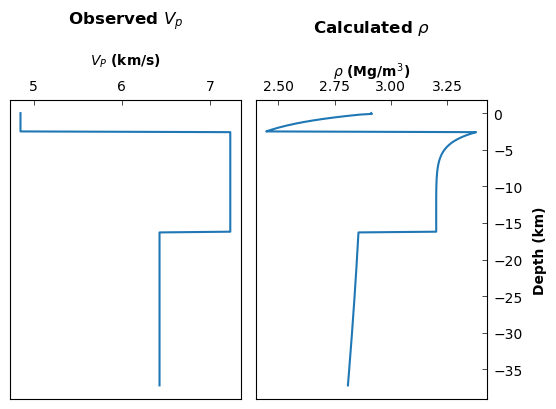

In [29]:
# Define plot settings
plot_type = 'line'
titles = [r'Observed ${V_p}$', r'Calculated $\rho$']
xlabels = [r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)']
ylabels = ['Depth (km)', 'Depth (km)']

# data1, data2 and data3 -- list of dictionaries for each panel for each data series.
data1 = [{'x': profile.data["Vp_hi_res"][:,1], 'y': profile.data["Vp_hi_res"][:,0]}]
data2 = [{'x': profile.data["rho_hi_res"][:,1], 'y': profile.data["rho_hi_res"][:,0]}]

# Call the plot_panels function
smplt.plot_panels([data1, data2], plot_type=plot_type, 
            cmap=None, titles=titles, 
            xlabels=xlabels, ylabels=ylabels,
            z_values=None, figure_scale=0.7, 
            save_path=None)

### Function approach

Again, it is possible by editing the options in the `convert_V_profile` function to convert this velocity profile using a function rather than step-bystep using the class objects.

In [30]:
# call density conversion function
# note that using profile_type="Vs" first calls a function to convert to Vp
# as is required by Brocher's (2005) approach.
profile_stephenson = smd.convert_V_profile(vp_file, 
                            profile_type="Vp", 
                            approach="stephenson",
                            working_file = True,
                            parameters = parameters,
                            T_dependence = True,
                            T_parameters = T_parameters_Vp)


working on ../TEST_DATA/EUROPE/Vp/RECEIVER_FUNCTION/DATA/M19_AQU_Vp.dat


IndexError: list index out of range

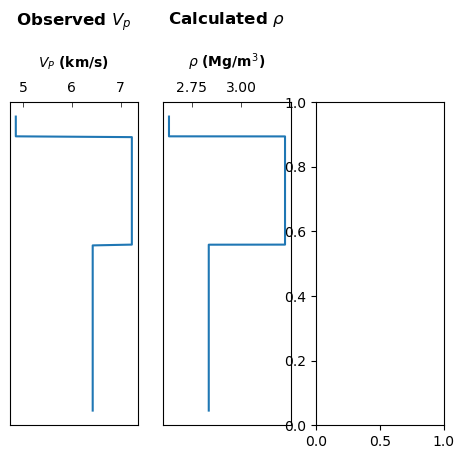

In [31]:
# data1, data2 and data3 -- list of dictionaries for each panel for each data series.
data1 = [{'x': profile_stephenson["Vp_hi_res"][:,1], 'y': profile_stephenson["Vp_hi_res"][:,0]}]
data2 = [{'x': profile_stephenson["rho"][:,1], 'y': profile_stephenson["rho"][:,0]}]
data3 = [{'x': profile_stephenson["p"][:,1], 'y': profile_stephenson["p"][:,0]}]

# Call the plot_panels function
smplt.plot_panels([data1, data2, data3], plot_type=plot_type, 
            cmap=None, titles=titles, 
            xlabels=xlabels, ylabels=ylabels,
            z_values=None, figure_scale=0.7, 
            save_path=None)

## Excluding the uppermost $x$ km

We can exclude the uppermost $x$ km from the density conversion, setting it to a constant value in order to avoid mismatches between exponential drop-off in the density conversion scheme that may or may not be present in the tru velocity profile.  This effect can be seen in the above example, where the layers are relatively coarse, and so an exponential veocity dropoff is imposed upon a layer of constant velocity.

To avoid this mismatch, we can set the `constant_density` and `constant_depth` parameters.  Both of these parameters must be set together.

In [19]:
# calculate density profile -- note default is the temperature dependence is True!
profile.V_to_density_stephenson(parameters, T_dependence = True, T_parameters = T_parameters_Vp,
                               constant_density = 2.75, constant_depth = 7)

Now we can plot the `'rho_hi_res'` array and see that the uppermost 7 km have been set to a density of 2.75 Mg/m<sup>3</sup>.  Note that if we are using the `temperature_dependence = True` option, then we are setting $\rho_\circ$ to constant, but this density value will still be subject to thermal expansion and compression.

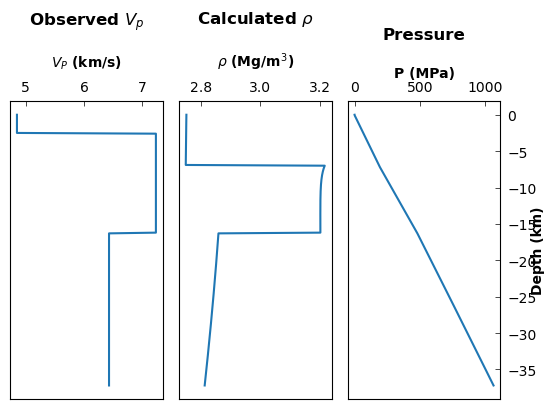

In [21]:
# Define plot settings
plot_type = 'line'
titles = [r'Observed ${V_p}$', r'Calculated $\rho$', 'Pressure']
xlabels = [r'${V_P}$ (km/s)', r'$\rho$ (Mg/m${^3}$)', 'P (MPa)']
ylabels = ['Depth (km)', 'Depth (km)', 'Depth (km)']

# data1, data2 and data3 -- list of dictionaries for each panel for each data series.
data1 = [{'x': profile.data["Vp_hi_res"][:,1], 'y': profile.data["Vp_hi_res"][:,0]}]
data2 = [{'x': profile.data["rho_hi_res"][:,1], 'y': profile.data["rho_hi_res"][:,0]}]
data3 = [{'x': profile.data["p"][:,1], 'y': profile.data["p"][:,0]}]

# Call the plot_panels function
smplt.plot_panels([data1, data2, data3], plot_type=plot_type, 
            cmap=None, titles=titles, 
            xlabels=xlabels, ylabels=ylabels,
            z_values=None, figure_scale=0.7, 
            save_path=None)

## Summary

We have now included temperature dependence within the density conversion scheme.  We have explored how to 